# Ej1

# 1.a

Una red de 2 neuronas con sus conexiones y pesos, donde E es la neurona exitatoria e I la inhibitoria. El peso de E hacia I vale a siendo a > 0, ya que E es exitatoria y el peso de I a E vale -a, debido a que se pedia que ambas tengan el mismo peso pero I es inhibitoria 
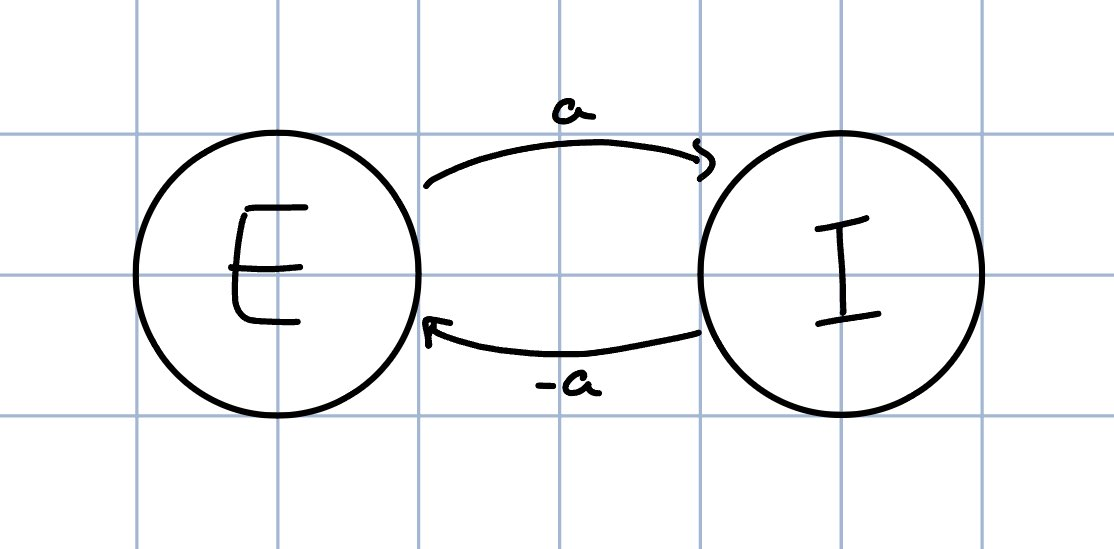

# 1.b
La matriz de pesos es:
\begin{bmatrix}
0 & a \\
-a & 0 \\
\end{bmatrix}

y sus autovalores son

$\lambda_1 = ai$

$\lambda_2 = -ai$

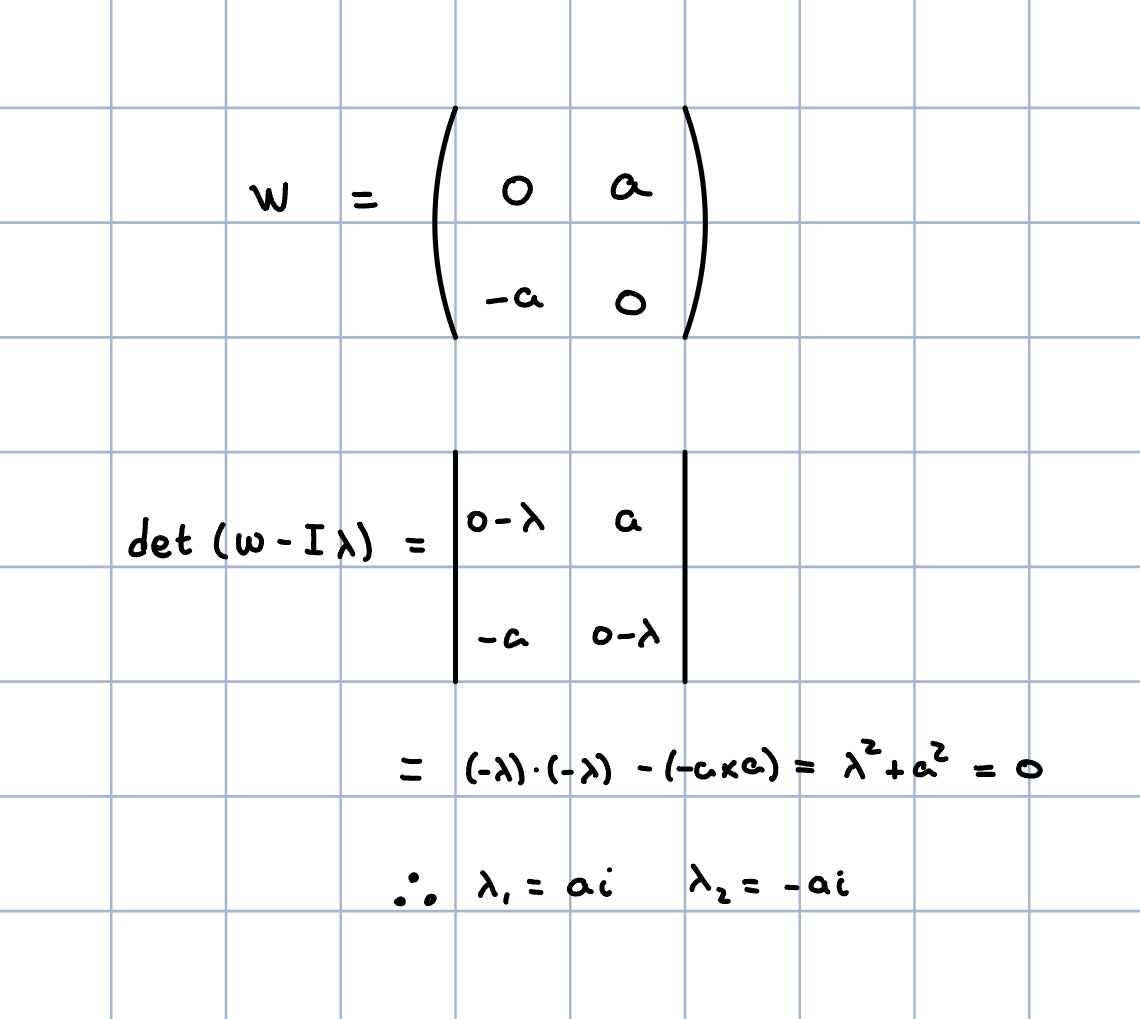


# 1.c
El resultado del sistema es:

$\dot{r}(t) = \frac{e^t}{\tau} \left( \cos(at) + \sin(at), \cos(at) - \sin(at) \right)$

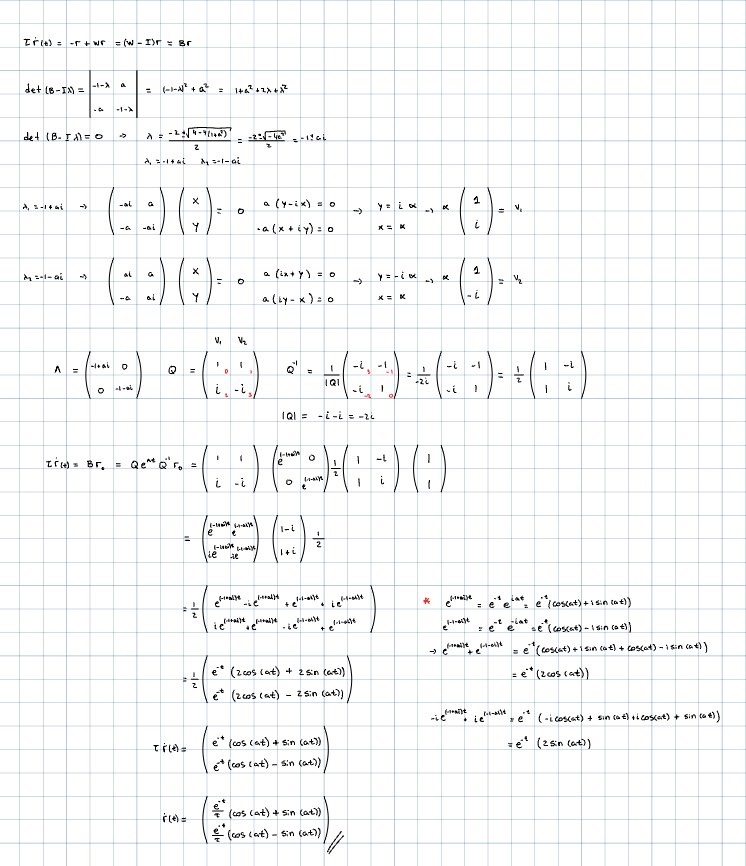